In [79]:
# Importing Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [80]:
df = pd.read_csv('ml-100k/u.info', header=None)
print("Details of users, items and ratings involved in the loaded movielens dataset: ",list(df[0]))

Details of users, items and ratings involved in the loaded movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [81]:
## same item id is same as movie id, item id column is renamed as movie id
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head() 

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [82]:
len(dataset), max(dataset['movie id']),min(dataset['movie id'])

(100000, 1682, 1)

In [83]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [84]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
movies = items_dataset[['movie id','movie title']]
movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Preprocessing & Exploratory Data Analysis (EDA)

In [86]:
## looking at length of original items_dataset and length of unique combination of rows in items_dataset after removing movie id column
len(items_dataset.groupby(by=column_names2[1:])),len(items_dataset)

(1664, 1682)

In [87]:
dataset.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

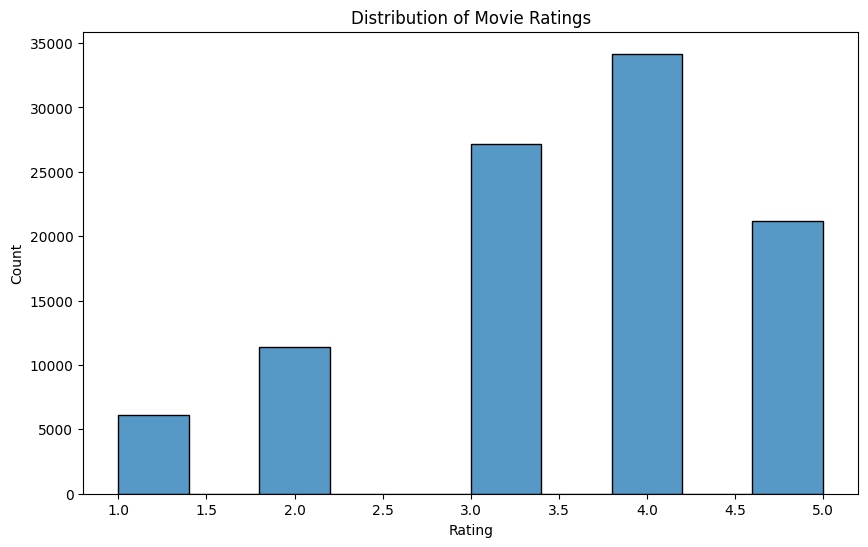

In [88]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(dataset['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Traditional Approach

In [89]:
# Step-1: Read user-item matrix
# Create a user-item matrix
user_item_matrix = dataset.pivot(index='user id', columns='movie id', values='rating').fillna(0)
user_item_matrix.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


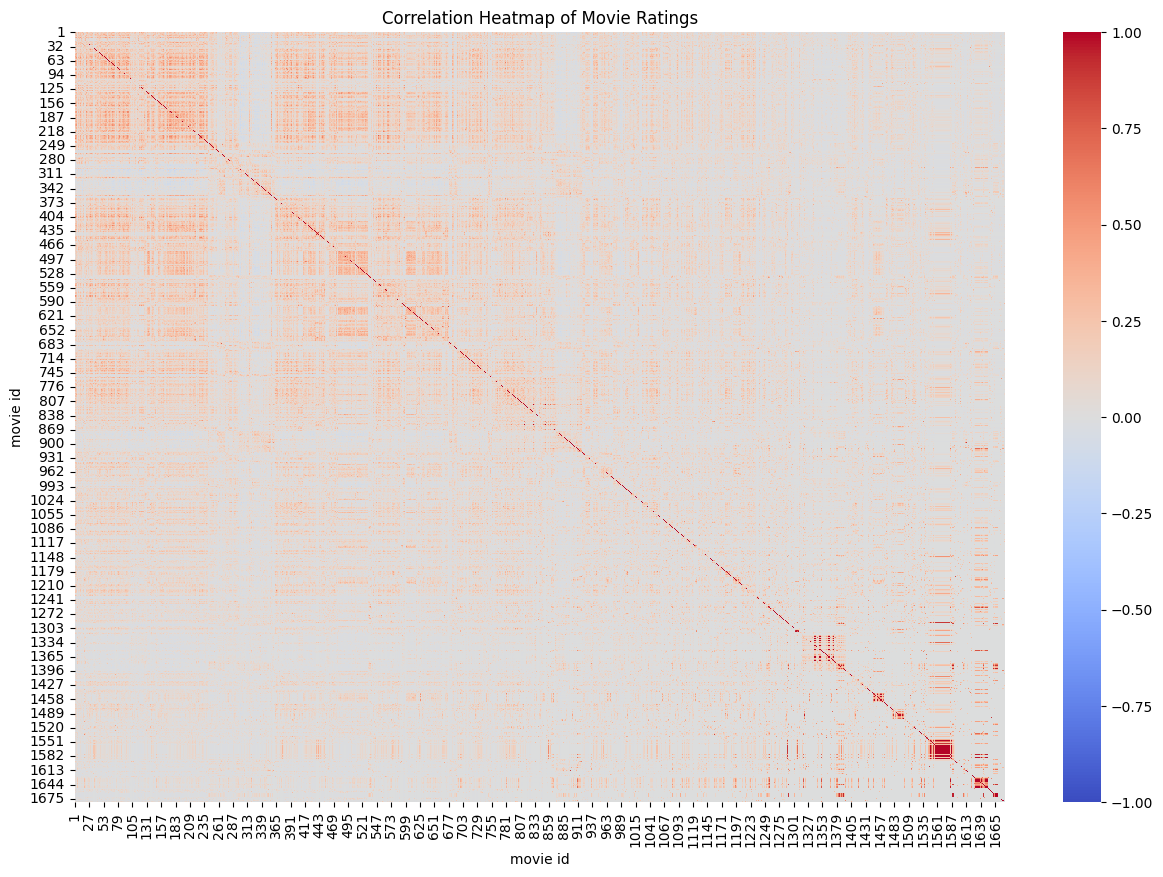

In [90]:
# Compute the correlation matrix
correlation_matrix = user_item_matrix.corr(method='pearson', min_periods=50)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Movie Ratings')
plt.show()

In [91]:
#Step-2: Identify Co-Rated Items

def get_common_items(user1, user2):
    common_items = user_item_matrix.loc[user1] * user_item_matrix.loc[user2]
    common_items = common_items[common_items > 0]
    return common_items.index


In [92]:
# Step-3: Compute user similarity

# Start timing
start_time = time.time()

# Compute the cosine similarity matrix using scikit-learn
user_similarity_matrix = cosine_similarity(user_item_matrix)

# Convert to a DataFrame for easier handling
user_similarity_matrix = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

# End timing
end_time = time.time()
print(f"Time taken to compute similarity matrix: {end_time - start_time} seconds")


Time taken to compute similarity matrix: 0.2035367488861084 seconds


In [93]:
user_similarity_matrix

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
2,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
3,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
4,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
5,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.118095,0.228583,0.026271,0.030138,0.071459,0.111852,0.107027,0.095898,0.039852,0.071460,...,0.066039,0.431154,0.258021,0.226449,0.432666,1.000000,0.087687,0.180029,0.043264,0.144250
940,0.314072,0.226790,0.161890,0.196858,0.239955,0.352449,0.329925,0.246883,0.120495,0.342961,...,0.327153,0.107024,0.187536,0.181317,0.175158,0.087687,1.000000,0.145152,0.261376,0.241028
941,0.148617,0.161485,0.101243,0.152041,0.139595,0.144446,0.059993,0.146145,0.143245,0.090305,...,0.046952,0.203301,0.288318,0.234211,0.313400,0.180029,0.145152,1.000000,0.101642,0.095120


In [94]:
# Step-4: Find nearest neighbors

def get_nearest_neighbors(user, k=5):
    user_similarities = user_similarity_matrix.loc[user].drop(user)
    nearest_neighbors = user_similarities.nlargest(k).index
    return nearest_neighbors


In [95]:
# Step-5: Compute prediction ratings

def predict_rating(user, item, k=5):
    neighbors = get_nearest_neighbors(user, k)
    neighbor_ratings = user_item_matrix.loc[neighbors, item]
    neighbor_similarities = user_similarity_matrix.loc[user, neighbors]
    
    weighted_sum = np.dot(neighbor_ratings, neighbor_similarities)
    sum_of_weights = neighbor_similarities.sum()
    
    if sum_of_weights == 0:
        return 0  # Avoid division by zero
    return weighted_sum / sum_of_weights


In [96]:
# Stpe-6: Produce top-N recommendations

def recommend_items_cf(user, N=5, k=5):
    user_ratings = user_item_matrix.loc[user]
    unrated_items = user_ratings[user_ratings == 0].index
    
    item_scores = {}
    for item in unrated_items:
        item_scores[item] = predict_rating(user, item, k)
    
    top_N_items = sorted(item_scores.items(), key=lambda x: x[1], reverse=True)[:N]
    
    
    top_N_items = [item for item, score in top_N_items]

    # Get movie titles for the recommended items
    top_N_movie_titles = movies[movies['movie id'].isin(top_N_items)]['movie title'].tolist()
    return top_N_movie_titles

# Example usage
user_id = 1
top_N_recommendations = recommend_items_cf(user_id, N=5)
print(f"Top-N recommendations for user {user_id}:")
top_N_recommendations


Top-N recommendations for user 1:


['Heat (1995)',
 'Adventures of Priscilla, Queen of the Desert, The (1994)',
 'Heathers (1989)',
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
 'Clear and Present Danger (1994)']

# Proposed Approach

In [97]:
# Step-2: Get co-rated items and their ratings

def get_common_items(user1, user2):

    common_items = user_item_matrix.loc[user1] * user_item_matrix.loc[user2]
    common_items = common_items[common_items > 0]
    return common_items
    

In [98]:
# Step-3: Classify similar users and remove sparse ratings

def classify_similar_users(user, k=5, min_ratings=5):
    # Filter out users with sparse ratings
    rated_items = user_item_matrix.loc[user][user_item_matrix.loc[user] > 0].index
    similar_users = {}
    
    for other_user in user_item_matrix.index:
        if other_user != user:
            other_rated_items = user_item_matrix.loc[other_user][user_item_matrix.loc[other_user] > 0].index
            common_items = rated_items.intersection(other_rated_items)
            
            if len(common_items) >= min_ratings:
                similar_users[other_user] = common_items
    
    return similar_users


In [99]:
# Step-4: Compute user similarity

def compute_user_similarity(user1, user2):
    # Compute cosine similarity between two users based on co-rated items
    common_items = get_common_items(user1, user2)
    if len(common_items) < 2:
        return 0
    
    user1_ratings = user_item_matrix.loc[user1, common_items.index]
    user2_ratings = user_item_matrix.loc[user2, common_items.index]
    
    return cosine_similarity([user1_ratings], [user2_ratings])[0][0]


In [100]:
def recommend_items_proposed(user, N=5, k=5, min_ratings=5, similarity_threshold=0.5):
    similar_users = classify_similar_users(user, k=k, min_ratings=min_ratings)
    
    # Step 3-6: Compute user similarity and select the most similar users
    user_similarities = {}
    for other_user, common_items in similar_users.items():
        similarity = compute_user_similarity(user, other_user)
        user_similarities[other_user] = similarity
    
    # Step 7: Set the similarity threshold
    nearest_neighbors = {k: v for k, v in sorted(user_similarities.items(), key=lambda item: item[1], reverse=True) if v > similarity_threshold}
    
    # Step 8: List the nearest neighbors
    nearest_neighbors = list(nearest_neighbors.keys())[:k]
    
    # Step 9: Compute the prediction rating
    predicted_ratings = {}
    for item in user_item_matrix.columns:
        if user_item_matrix.loc[user, item] == 0:
            rating_numerator = 0
            rating_denominator = 0
            for neighbor in nearest_neighbors:
                if user_item_matrix.loc[neighbor, item] > 0:
                    similarity = user_similarities[neighbor]
                    rating_numerator += user_item_matrix.loc[neighbor, item] * similarity
                    rating_denominator += similarity
            if rating_denominator != 0:
                predicted_ratings[item] = rating_numerator / rating_denominator
    
    # Step 10: Produce top N recommendation
    top_N_recommendations = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:N]
    top_N_items = [item for item, rating in top_N_recommendations]
    
    # Get movie titles for the recommended items
    top_N_movie_titles = movies[movies['movie id'].isin(top_N_items)]['movie title'].tolist()
    
    return top_N_movie_titles

# Example usage
user_id = 1
top_N_recommendations = recommend_items_proposed(user_id, N=5, k=5, min_ratings=5, similarity_threshold=0.3)
print(f"Top-N recommendations for user {user_id}:")
top_N_recommendations

Top-N recommendations for user 1:


['Sense and Sensibility (1995)',
 'L.A. Confidential (1997)',
 'Titanic (1997)',
 "Schindler's List (1993)",
 'To Kill a Mockingbird (1962)']